In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import kernels
import knn


In [45]:
data = pd.read_csv("https://www.openml.org/data/get_csv/21756804/iris.arff")
data.head()


,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
data["class"] = pd.factorize(data["class"])[0]

n_classes = 3
data.head()


,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [47]:
x_train, x_test, y_train, y_test = \
    train_test_split(data.drop("class", axis=1), data["class"], test_size=0.33, random_state=1)

print("train: {} samples, test: {} samples".format(len(x_train), len(x_test)))


train: 100 samples, test: 50 samples


In [48]:
dist_fs = [kernels.euclidean]
kernel_fs = [kernels.uniform, kernels.gaussian, kernels.cosine, kernels.logistic, kernels.sigmoid]


In [49]:
LEARN = False

if LEARN:
    ks = [1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12]
    for k in ks:
        for dist_f in dist_fs:
            for kernel_f in kernel_fs:
                result = np.zeros((n_classes, n_classes))
                margins = []
                for i, sample in x_train.iterrows():
                    model = knn.KNN(x_train.drop(i), y_train.drop(i), k=k, dist_f=dist_f, kernel_f=kernel_f)
                    predict_y, margin = model.run(sample, y_train[i])
                    margins.append(margin)
                    result[predict_y][y_train[i]] += 1
                print("{:6} : k={:3}, dist={:8}, kernel={:8}".format(kernels.f_score(result)[0], k, dist_f.__name__, kernel_f.__name__))

if LEARN:
    ds = [0.01, 0.1, 0.5, 1.0, 2.0, 4.0, 6.0, 8.0, 12.0]
    for d in ds:
        for dist_f in dist_fs:
            for kernel_f in kernel_fs:
                result = np.zeros((n_classes, n_classes))
                margins = []
                for i, sample in x_train.iterrows():
                    model = knn.KNN(x_train.drop(i), y_train.drop(i), d=d, dist_f=dist_f, kernel_f=kernel_f)
                    predict_y, margin = model.run(sample, y_train[i])
                    margins.append(margin)
                    result[predict_y][y_train[i]] += 1
                print("{:6} : d={:5}, dist={:8}, kernel={:8}".format(kernels.f_score(result)[0], d, dist_f.__name__, kernel_f.__name__))


1.0 : k=8, dist=chebyshev, kernel=cosine


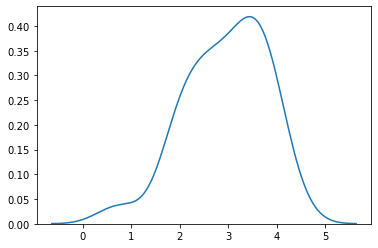

In [50]:
k = 8
dist_f = kernels.chebyshev
kernel_f = kernels.cosine

result = np.zeros((n_classes, n_classes))
margins = []

model = knn.KNN(x_test, y_test, k=k, dist_f=dist_f, kernel_f=kernel_f)

for i, sample in x_test.iterrows():
    predict_y, margin = model.run(sample, y_test[i])
    result[predict_y][y_test[i]] += 1
    margins.append(margin)
print("{} : k={}, dist={}, kernel={}".format(kernels.f_score(result)[0], k, dist_f.__name__, kernel_f.__name__))
sns.kdeplot(margins)
